# Astronomical Spectroscopy

Note that text here and in thesis text is different.
This notebook serves for images generation.
To generate bigger images change Matplotlib backend to
nbagg:

    %matplotlib nbagg

## Electromagnetic Radiation and Spectrum

http://astronomy.swin.edu.au/cosmos/

Electromagnetic radiation is pair of electric and magnetic
fields that propagate together at the speed of light
($ c = 299 792 458 ms^{-1} $).
Visible light, radio waves, X-rays and gamma rays are
examples of electromagnetic radiation. Electromagnetic
spectrum is collective term for known range of
electromagnetic radiation. The electric and magnetic field
oscillates and produces electromagnetic waves.

The electromagnetic wave is describe in terms of frequency
or wavelength.

* Frequency ($f$) is the number of waves per second and
its unit is Hertz.
* Wavelength ($\lambda$) is the distance between successive
crests or troughs in the wave and it is meausred is meters
or astronomy usually uses Angstrom.

$$ 1 \unicode{x212B} = 10^{-10} m $$

Frequency and wavelength are related by wave equation:

$$ c = \lambda f $$

## Blackbody Radiation

A blackbody is a hypothetical object which is a perfect
absorber and emitter of radiation over all wavelengths.
The spectral flux distribution of blackbody's thermal
energy depends on its temperature.

Stars are often modelled as blackbodies in astronomy.
Their spectrum approximates the blackbody spectrum.

In [1]:
import numpy as np
import astropy.units
import astropy.analytic_functions
import astropy.io.fits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wavelens = np.linspace(100, 30000, num=1000)
temperature = np.array([5000, 4000, 3000]).reshape(3, 1)
with np.errstate(all='ignore'):
    flux_lam = astropy.analytic_functions.blackbody_lambda(
        wavelens,
        temperature
    )

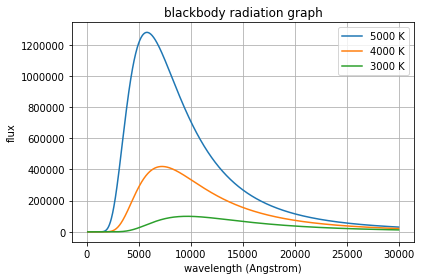

In [3]:
for flux, temp in zip(flux_lam, temperature.ravel()):
    plt.plot(wavelens, flux, label='{} K'.format(temp))
plt.legend()
plt.xlabel(r'wavelength (Angstrom)')
plt.ylabel('flux')
plt.title('blackbody radiation graph')
plt.grid()
plt.tight_layout()

## Spectral Lines

Spectral lines can be used to identify the chemical
composition of stars. If a light from a star is separeted
with a prism its spectrum of colours is crossed with
discrete lines. This can be also visualized as flux
of particural wavelengths. **Flux** is the total amount of
energy that crosses a unit area per unit time.

There are two types of spectral lines:

* emission and
* absorption lines.

**Emission line** occurs when atom in a
higher energy level (excited state) return to lower energy
level and releases energy. According to quantum theory
every atom has a unique set of energy levels. Therefore,
the atom can emit electomagnetic radiation of particular
wavelengths equal to the difference between the energy
levels. Energy and wavelength, frequency are related
throught Planck-Einstein relation:

$$ E = h f, \quad E = \frac{h c}{\lambda} $$

where $h = 6.62607004 \cdot 10^{-34} J s$ is
Planck constant. On a graph of wavelengths fluxes emission
lines appear as peaks above the continuum level.

**Absorption lines** are opposite of emissions. They will
appear when there is an absorbing material between the
source and the observer. The material could be outer layers
of a stars or interstellar gas. Atoms will absorb specific
energies from the electromagnetic spectrum specifically to
atom's energy levels. On graph these absorption
features are show below the level of a star's blacbody
continuum spectrum.

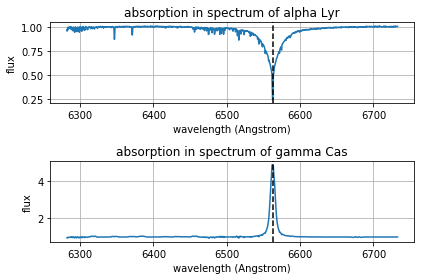

In [4]:
f, (ax1, ax2) = plt.subplots(2, 1)
with astropy.io.fits.open('samples/alpha-lyr-absorption.fits') as hdulist:
    data = hdulist[1].data
    ax1.plot(
        data.field('spectral'),
        data.field('flux')
    )
    ax1.set_xlabel('wavelength (Angstrom)')
    ax1.set_ylabel('flux')
    ax1.set_title('absorption in spectrum of {}'.format(hdulist[1].header['OBJECT']))
    ax1.axvline(x=6562.8, color='black', label='H-alpha', linestyle='dashed')
    ax1.grid()
    
with astropy.io.fits.open('ssap/uk220017.fits') as hdulist:
    data = hdulist[1].data
    ax2.plot(
        data.field('spectral'),
        data.field('flux')
    )
    ax2.set_xlabel('wavelength (Angstrom)')
    ax2.set_ylabel('flux')
    ax2.set_title('absorption in spectrum of {}'.format(hdulist[1].header['OBJECT']))
    ax2.axvline(x=6562.8, color='black', label='H-alpha', linestyle='dashed')
    ax2.grid()

f.tight_layout()

## Continuum Normalization

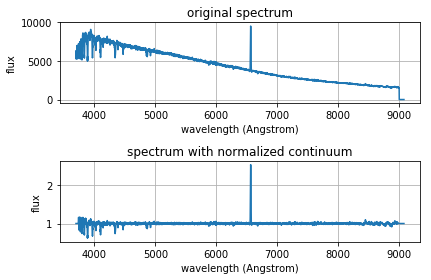

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1)

with astropy.io.fits.open('samples/bt-cmi-lamost.fits') as hdulist:
    header = hdulist[0].header
    start = header['CRVAL1']
    delta = header['CD1_1']
    pix = header['CRPIX1']
    ax1.plot(
        np.array([10 ** (start + (i - pix + 1) * delta) for i in range(header['NAXIS1'])]),
        hdulist[0].data[0],
    )
    ax1.set_title('original spectrum')
    ax1.set_xlabel('wavelength (Angstrom)')
    ax1.set_ylabel('flux')
    ax1.grid()
    
with astropy.io.fits.open('samples/bt-cmi-lamost.fits') as hdulist:
    header = hdulist[0].header
    start = header['CRVAL1']
    delta = header['CD1_1']
    pix = header['CRPIX1']
    ax2.plot(
        np.array([10 ** (start + (i - pix + 1) * delta) for i in range(header['NAXIS1'])]),
        hdulist[0].data[2],
    )
    ax2.set_title('spectrum with normalized continuum')
    ax2.set_xlabel('wavelength (Angstrom)')
    ax2.set_ylabel('flux')
    ax2.grid()
    
f.tight_layout()

## LAMOST versus Ondřejov

Cross matched spectum of BT CMi.

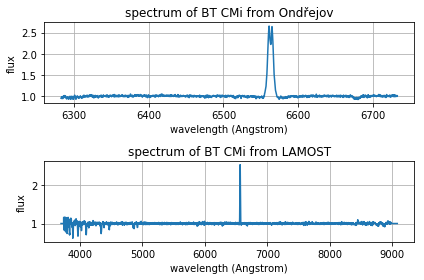

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1)
with astropy.io.fits.open('samples/bt-cmi-ondrejov.fits') as hdulist:
    header = hdulist[1].header
    data = hdulist[1].data
    ax1.plot(
        data.field('spectral'),
        data.field('flux')
    )
    ax1.set_xlabel('wavelength (Angstrom)')
    ax1.set_ylabel('flux')
    ax1.set_title('spectrum of {} from Ondřejov'.format(header['OBJECT']))
    ax1.grid()

with astropy.io.fits.open('samples/bt-cmi-lamost.fits') as hdulist:
    header = hdulist[0].header
    start = header['CRVAL1']
    delta = header['CD1_1']
    pix = header['CRPIX1']
    ax2.plot(
        np.array([10 ** (start + (i - pix + 1) * delta) for i in range(header['NAXIS1'])]),
        hdulist[0].data[2],
    )
    ax2.set_title('spectrum of BT CMi from LAMOST')
    ax2.set_xlabel('wavelength (Angstrom)')
    ax2.set_ylabel('flux')
    ax2.grid()
    
f.tight_layout()